## Workbook for Loan Status Prediction using Machine Learning

## Rationale
It is important to understand approval and rejection of loans for users. Utilizing a dataset from kaggle, is important to build out a model that will be applied to a lending application built as a SAAS Platform

### Import the Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### Process Data

In [5]:
# load dataset
data = pd.read_csv('loan_pred_data.csv', encoding_errors='ignore')

# printing dataset shape
print(f"Dataset shape {data.shape}")

Dataset shape (614, 13)


In [6]:
# Print first 5 rows of the data set
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# Print last 5 rows of the data set
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
# Understand the dataset in terms of statistical description
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# show all the data columns:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
# check missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Check data types
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
# Check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
# Replace missing values
# For object type columns use mode
# For other types utilize means

for col in data.columns:
    if data[col].dtypes == 'object':
        data[col].fillna(data[col].mode()[0], inplace = True)
    else:
        data[col].fillna(data[col].mean(), inplace= True)



/var/folders/04/bc2yl_sj17s43ntxkxm5gk1r0000gn/T/ipykernel_89310/1465135680.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace = True)
/var/folders/04/bc2yl_sj17s43ntxkxm5gk1r0000gn/T/ipykernel_89310/1465135680.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [15]:
data['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

Change Loan status column to Y -> 1, N -> 0

In [16]:
data.replace({"Loan_Status": {'N': 0, 'Y': 1}}, inplace=True)
data.head()

/var/folders/04/bc2yl_sj17s43ntxkxm5gk1r0000gn/T/ipykernel_89310/3597336013.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Loan_Status": {'N': 0, 'Y': 1}}, inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [19]:
# Edit Dependent Columns values and Replace 3+ with 4 to avoid errors
data['Dependents'].value_counts()

data.replace({"Dependents": {'3+': 4}}, inplace=True)


In [21]:
data['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

### Data Visualization

<Axes: xlabel='Education', ylabel='count'>

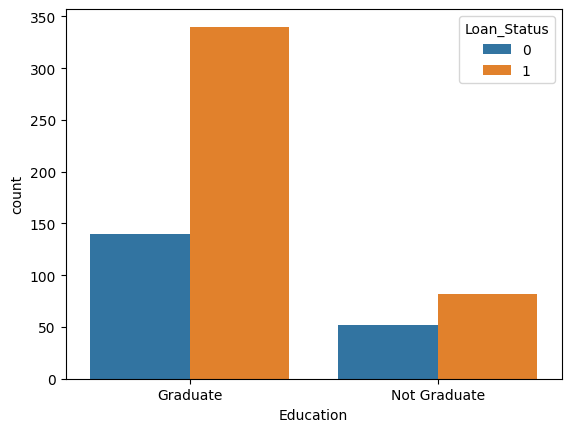

In [22]:
# Education and Loan Status
sns.countplot(x = 'Education', hue='Loan_Status', data=data)

Notes:
AS Observed:
    - Applicants that are graduates have higher application approval
    - Applicants who are not graduates have lesser application approval

In [23]:
# Married and Loan Status

<Axes: xlabel='Married', ylabel='count'>

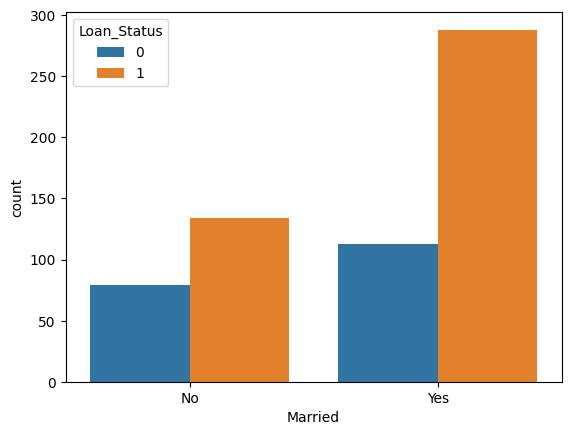

In [25]:
sns.countplot(x = 'Married', hue='Loan_Status', data=data)

### Observed:
- Married Applicants have a higher % approval
- Unmarried Applicants have a lower % approval

<Axes: xlabel='Gender', ylabel='count'>

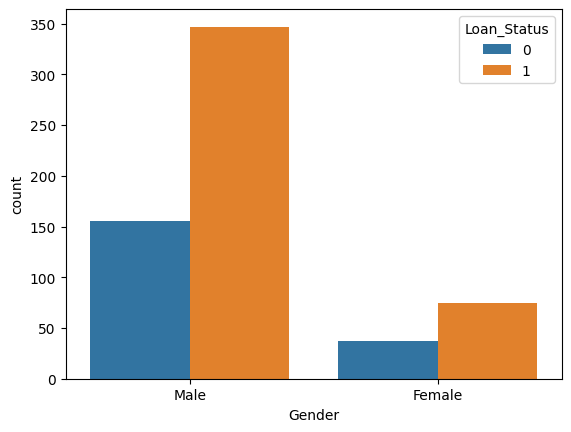

In [26]:
# Compare Gender to Loan Status Approvals
sns.countplot(x = 'Gender', hue='Loan_Status', data=data)

### Notes:
- Male Applicants have a higher % success with loan approvals

In [32]:
# changing dependent column data type to int
data['Dependents'] = data['Dependents'].astype('int')

In [33]:
# Convert Categorical Columns to Numerical Values

# initialize label encoder
label_encoder = LabelEncoder()
categorical_columns = ['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

data.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [34]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


Data Modelling and Feature Engineering

In [37]:
# Create Variable for Feature Columns and Outcome Column
X = data.drop(columns=['Loan_ID', 'Loan_Status'], axis = 1)
y = data['Loan_Status']


In [38]:
# Split into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, stratify=y)

In [40]:
# Print out the shape the data
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(552, 11) (62, 11) (552,) (62,)


In [42]:
svc_classifier = svm.SVC(kernel='linear')

In [43]:
# train the support vector machine model
svc_classifier.fit(X_train, Y_train)

SVC(kernel='linear')

### Model Evaluation

In [46]:
X_train_prediction = svc_classifier.predict(X_train)
accuracy_train = accuracy_score(Y_train, X_train_prediction)
print("Accuracy from Training data {:.2%}".format(accuracy_train))

Accuracy from Training data 79.17%


In [48]:
# Accuracy on test set
X_test_prediction = svc_classifier.predict(X_test)
accuracy_test = accuracy_score(Y_test, X_test_prediction)
print("Accuracy on Test Data {:.2%}".format(accuracy_test))

Accuracy on Test Data 74.19%


### Summary

## Tasks Completed

### Data Preprocessing
1. Data Processing:
- Missing values for object type: replaced with most frequent value
- Missing values in numerical data were replaced with mean
- Drop rows with missing critical values

### Label Encoding
2. Label Encoding
- Categorical data is converted to numerical data using label encoding

### Model Selection
3. Model Selection
-  A Support vector machine (SVM) model is used to loan prediction

### Model Training and Evaluation
4. Model Training and Evaluation
- The SVM model achieved an accuracy of 79.17% on the training data
- The test data accuracy results however demonstrated lower value of 74.19%
